In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("Data/Human Development Index - Full.csv")

In [3]:
df.describe()

,HDI Rank (2021),Human Development Index (1990),Human Development Index (1991),Human Development Index (1992),Human Development Index (1993),Human Development Index (1994),Human Development Index (1995),Human Development Index (1996),Human Development Index (1997),Human Development Index (1998),...,Material footprint per capita (tonnes) (2012),Material footprint per capita (tonnes) (2013),Material footprint per capita (tonnes) (2014),Material footprint per capita (tonnes) (2015),Material footprint per capita (tonnes) (2016),Material footprint per capita (tonnes) (2017),Material footprint per capita (tonnes) (2018),Material footprint per capita (tonnes) (2019),Material footprint per capita (tonnes) (2020),Material footprint per capita (tonnes) (2021)
count,191.000000,141.000000,141.000000,141.000000,141.000000,141.000000,152.000000,152.000000,152.000000,152.000000,...,157.00000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,95.811518,0.599277,0.601979,0.604525,0.608504,0.613411,0.617625,0.623336,0.628599,0.634059,...,15.55535,15.675860,15.631146,15.637707,15.637834,15.798089,14.840000,15.019490,15.019490,15.019490
std,55.307333,0.164044,0.164100,0.164457,0.165456,0.166191,0.164990,0.165710,0.166592,0.167486,...,14.49240,14.930422,14.730498,15.063439,15.412834,15.739461,13.932553,14.644025,14.644025,14.644025
min,1.000000,0.216000,0.218000,0.222000,0.227000,0.232000,0.238000,0.243000,0.248000,0.256000,...,0.43000,0.420000,0.450000,0.560000,0.600000,0.610000,0.500000,0.470000,0.470000,0.470000
25%,48.500000,0.482000,0.484000,0.485000,0.485000,0.486000,0.486750,0.490750,0.492000,0.493000,...,4.53000,4.510000,4.350000,4.360000,4.420000,4.560000,4.590000,4.620000,4.620000,4.620000
50%,96.000000,0.628000,0.629000,0.627000,0.634000,0.639000,0.646500,0.653000,0.658000,0.664500,...,10.53000,10.370000,10.680000,10.020000,10.400000,10.740000,11.150000,10.620000,10.620000,10.620000
75%,143.500000,0.728000,0.729000,0.727000,0.731000,0.741000,0.745250,0.752000,0.759250,0.767000,...,20.90000,20.780000,20.750000,21.290000,19.790000,20.030000,18.960000,18.870000,18.870000,18.870000
max,191.000000,0.872000,0.873000,0.878000,0.880000,0.884000,0.885000,0.887000,0.890000,0.895000,...,74.56000,82.970000,81.100000,86.780000,83.510000,88.700000,71.160000,85.700000,85.700000,85.700000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Columns: 880 entries, ISO3 to Material footprint per capita (tonnes) (2021)
dtypes: float64(876), object(4)
memory usage: 1.3+ MB


In [5]:
len(df.columns[["2021" in col for col in df.columns]])

35

In [6]:
df.columns[["2021" in col for col in df.columns]]

Index(['HDI Rank (2021)', 'Human Development Index (2021)',
       'Life Expectancy at Birth (2021)', 'Expected Years of Schooling (2021)',
       'Mean Years of Schooling (2021)',
       'Gross National Income Per Capita (2021)', 'GDI Group (2021)',
       'Gender Development Index (2021)', 'HDI female (2021)',
       'Life Expectancy at Birth, female (2021)',
       'Expected Years of Schooling, female (2021)',
       'Mean Years of Schooling, female (2021)',
       'Gross National Income Per Capita, female (2021)', 'HDI male (2021)',
       'Life Expectancy at Birth, male (2021)',
       'Expected Years of Schooling, male (2021)',
       'Mean Years of Schooling, male (2021)',
       'Gross National Income Per Capita, male (2021)',
       'Inequality-adjusted Human Development Index (2021)',
       'Coefficient of human inequality (2021)', 'Overall loss (%) (2021)',
       'Inequality in life expectancy (2021)', 'Inequality in eduation (2021)',
       'Inequality in income (2021)', 

In [7]:
year_2021 = df[df.columns[["2021" in col for col in df.columns]]]

In [8]:
year_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 35 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   HDI Rank (2021)                                                       191 non-null    float64
 1   Human Development Index (2021)                                        191 non-null    float64
 2   Life Expectancy at Birth (2021)                                       195 non-null    float64
 3   Expected Years of Schooling (2021)                                    193 non-null    float64
 4   Mean Years of Schooling (2021)                                        191 non-null    float64
 5   Gross National Income Per Capita (2021)                               193 non-null    float64
 6   GDI Group (2021)                                                      172 non-null    float64
 7  

In [9]:
year_2021.dropna(inplace=True)

C:\Users\OM-FI\AppData\Local\Temp\ipykernel_24236\2561048780.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_2021.dropna(inplace=True)


In [10]:
inequality_levels = year_2021["Inequality in income (2021)"].quantile([0.25, 0.5, 0.75])
def income_level(x):
    levels = ["Low","Medium","High"]
    for level, category in zip(inequality_levels, levels):
        if x <= level:
            return category
    else:
        return "Very High"
y = year_2021["Inequality in income (2021)"].apply(income_level)

In [12]:
X = year_2021.drop(columns=["Inequality in income (2021)"])

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
clf = DecisionTreeClassifier(criterion='gini', random_state=42, max_depth=3)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

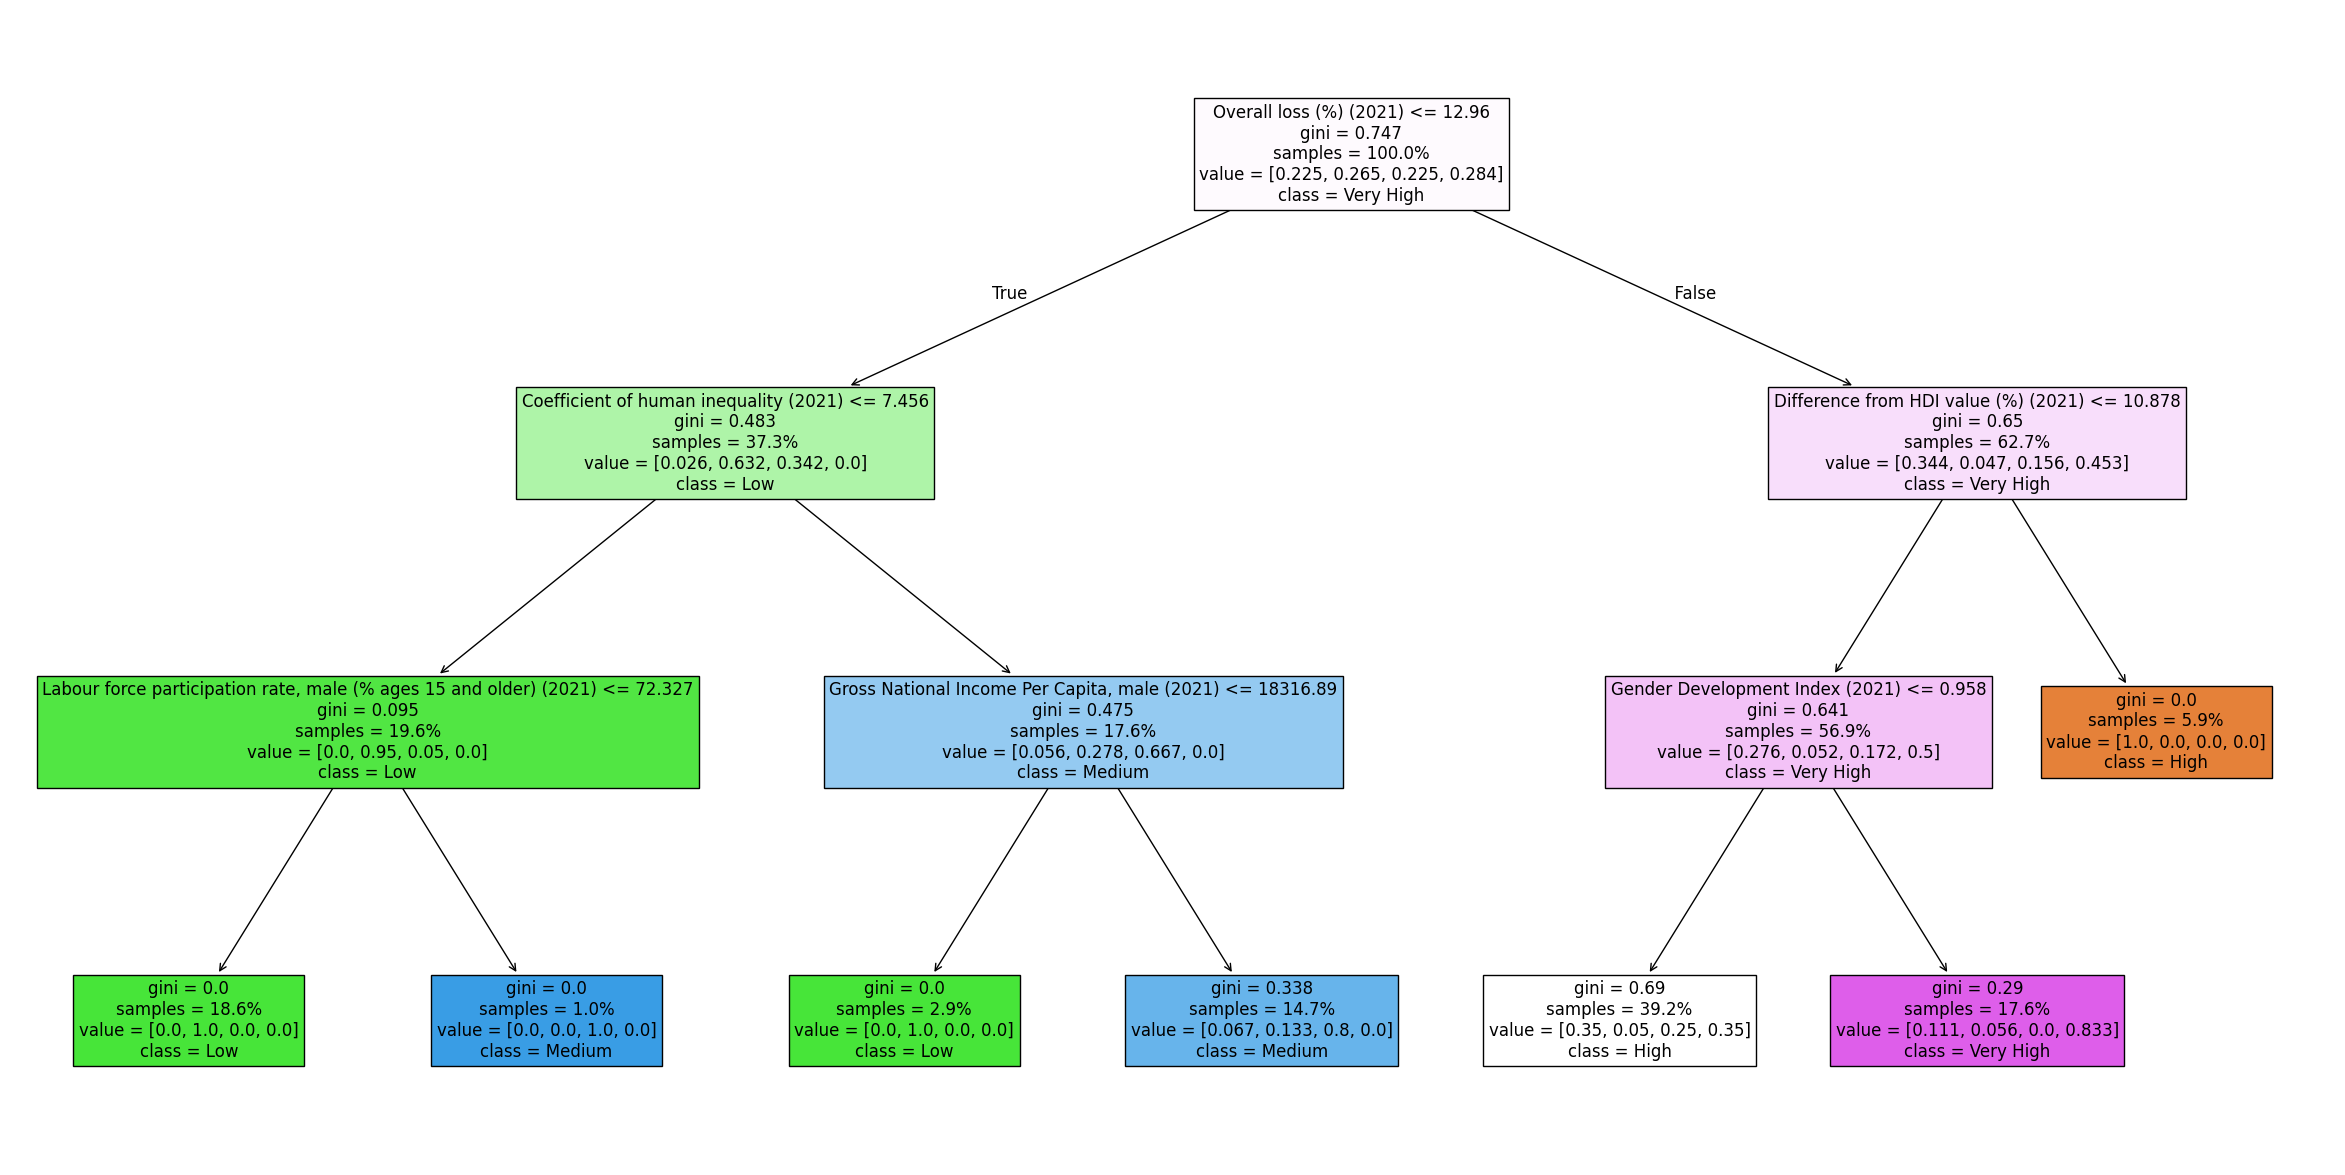

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(30, 15))
plot_tree(clf, feature_names=X.columns, class_names=clf.classes_, filled=True, proportion=True, fontsize=12)
plt.show()